# Exploring MNIST dataset

In the previous notebook, the very basics of the FAIR principles have been introduced. Now we would like to perform an exercise of evaluating the FAIRness of a popular dataset. For this purpose, we are going to explore the MNIST handwritten digits dataset.

This dataset contains a total of 70,000 greyscale images of handwritted digits. Using the MNIST dataset is like the _Hello World_ of AI problems. All images are of 28 x 28 pixels in size. 60,000 of these images are usually identified as training data and the remaining 10,000 are test data. Let's explore the dataset and some of its content first. We will use the **PyTorch** package to get the data and explore it.

In [ ]:
import torch
from torchvision import datasets, transforms

!mkdir -p data

data_dir = "data"
train_dataset = datasets.MNIST(data_dir, 
                               train=True, 
                               download=True,
                               transform=transforms.ToTensor()
                               )
test_dataset = datasets.MNIST(data_dir, 
                              train=False, 
                              download=True,
                              transform=transforms.ToTensor() 
                               )

When one runs the code for the first time, it shows log messages like the following:

`Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw
Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw`

As one can see, these datasets are downloaded from the website <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>. If you explore the website, you can find the following compressed ubyte files that store this data:

- train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
- train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
- t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
- t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes) 

In fact, you can use the corresponding URLs to download your data and then use the PyTorch DataLoader to obtain them in tensor format.

In [6]:
!rm -rf data/MNIST/raw/*
!wget -P data/MNIST/raw http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -P data/MNIST/raw http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -P data/MNIST/raw http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -P data/MNIST/raw http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!gunzip -k data/MNIST/raw/*gz

train_dataset = datasets.MNIST(data_dir, 
                               train=True, 
                               download=False,
                               transform=transforms.ToTensor()
                               )
test_dataset = datasets.MNIST(data_dir, 
                              train=False, 
                              download=False,
                              transform=transforms.ToTensor() 
                               )

--2021-10-29 11:40:24--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:3036::ac43:ab4c, 2606:4700:3034::6815:1d24, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:3036::ac43:ab4c|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘data/MNIST/raw/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  38.8MB/s    in 0.2s    

2021-10-29 11:40:25 (38.8 MB/s) - ‘data/MNIST/raw/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-10-29 11:40:25--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:3036::ac43:ab4c, 2606:4700:3034::6815:1d24, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:3036::ac43:ab4c|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-g

Note that we used `wget` to manually download the files and then uncompressed them using `gunzip`. The PyTorch DataLoader reads these files and prepares them in a way so that they can be readily used for training within the pyTorch framework. 

Now we can play around a little with these datasets to see what is in them and how they are structured. First, we can see how many entries we have in each of the training and test datasets, and how individual entries are structured.

In [18]:
print("Number of images in Training data: {}".format(len(train_dataset)))
print("Number of images in Test data: {}".format(len(test_dataset)))
print("\n")
print("Data type of individual entries: {}".format(type(train_dataset[0])))
print("Number of entries within each individual entry: {}".format(len(train_dataset[0])))
print("\n")
for ii in range(len(train_dataset[0])):
    print("Data type of entry {}: {}".format(ii, type(train_dataset[0][ii])))
    if type(train_dataset[0][ii]) == torch.Tensor:
        print("Entry {} is a tensor of shape: {}".format(ii, list(train_dataset[0][ii].shape)))

Number of images in Training data: 60000
Number of images in Test data: 10000


Data type of individual entries: <class 'tuple'>
Number of entries within each individual entry: 2


Data type of entry 0: <class 'torch.Tensor'>
Entry 0 is a tensor of shape: [1, 28, 28]
Data type of entry 1: <class 'int'>


As we can see, the training and test datasets respectively have 60000 and 10000 entries where each entry is a tuple object of size 2. The first of these is a tensor object of shape $1 \times 28 \times 28$ and the second is an integer. At this point, we can probably guess that the first object is probably a grayscale $28 \times 28$ image. A color image typically has a size of $3\times M\times N$ (for RGB encoding) or $4\times M\times N$ (for CMYK encoding), where $M$ and $N$ represent the pixel size in each dimension. The second object, being an integer, is probably the label of the image, telling us which digit the image represents. 

Let's visualize one such entry.

Label of the image: 5
Showing the image:


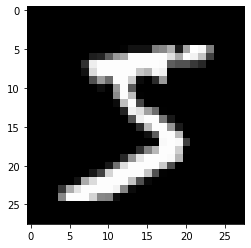

In [20]:
from matplotlib import pyplot as plt
import numpy as np

print("Label of the image: {}".format(train_dataset[0][1]))
print("Showing the image:")
plt.imshow(train_dataset[0][0].reshape(28,28).numpy(), cmap="gray")

# FAIRness Evaluation of MNIST dataset

Now, we can start exploring how this dataset measures according to the FAIR metrics we already introduced in the previous notebook. 

## Findability

_F1. (Meta)data are assigned a globally unique and persistent identifier_

The identifier associated with the MNIST dataset is essentially the URL of the hosting web server: <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>. This is clearly unique but not necessarily persistent as webpages are prone to deprecation when domain names are lost or restructured.

**Assessment of uniqueness: Pass <br/>
Assessment of persistence: Fail**

_F2. Data are described with rich metadata_

The metadata of this dataset is essentially described by a block of text and  no persistent identifier for metadata is provided. The textual description provides enough details of how the dataset was constructed and the content and format of these datasets.

**Assessment of machine readability of metadata: Fail <br/>**
**Assessment of richness of metadata: Pass**

_F3. Metadata clearly and explicitly include the identifier of the data they describe_

The textual description does not include the dataset identifier, the URL used to access this dataset.

**Assessment: Fail**

_F4. (Meta)data are registered or indexed in a searchable resource_

Given the widespread use of the MNIST dataset, it is simple to find via quick web searches. Searching in Google Dataset Search reveals multiple indexed instances of the MNIST dataset that are derived and rehosted by other communities like <a href="https://www.kaggle.com/hojjatk/mnist-dataset">Kaggle</a> and <a href="https://deepai.org/dataset/mnist">DeepAI</a>. However, the original dataset is not readily found via the dataset search.

**Assessment: Partially Pass**

## Accessibility

_A1. (Meta)data are retrievable by their identifier using a standardised communications protocol_

The MNIST dataset is an open dataset, and can be accessed via standard HTTP protocol.

**Assessment: Pass**

_A2. Metadata are accessible, even when the data are no longer available_

As the metadata is hosted by the same webpage and does not come with its own unique and persistent identifier, it may be difficult to retrieve the metadata if the dataset is lost.

**Assessment: Fail**

## Interoperability

_I1. (Meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation_

The metadata comes with elaborate explanation of the format. The files are essentially in binary format with certain information about its organization explained in the metadata.

**Assessment: Pass**

_I2. (Meta)data use vocabularies that follow FAIR principles_

The metadata is descriptive but certain items that it describe don't follow the FAIR principles themselves. For instance, the IDX file format used to present the data has been described but it does not come with a unique identifier or accessible metadata for this format.

**Assessment: Partially Pass**

_I3. (Meta)data include qualified references to other (meta)data_

The documentation comes with a large number of references for application of this database for image classification programs. However, it does not provide references to the original datasets used to construct it, neither does it include any reference to the formatting used for the dataset.

**Assessment: Fail**

## Reusability

_R1.1. (Meta)data are released with a clear and accessible data usage license_

The documentation does not clearly specify any license field.

**Assessment: Fail**

_R1.2. (Meta)data are associated with detailed provenance_

Metadata explains how this dataset was created using other larger datasets. It also explains how the images are formatted.

**Assessment: Pass**

_R1.3. (Meta)data meet domain-relevant community standards_

Being a widely used dataset for computer vision and image recognition tasks, the metadata provides adequate details about its content, format and representation.

**Assessment: Pass**

# Interpreting the FAIRness Evaluation

One can ask- what's all the fuss for? MNIST is a well established and widely used dataset and who cares if it does not follow some customized set of metrics.

We can see that even a widely used database like MNIST fails a number of FAIRness tests. MNIST is a relatively small and simple dataset with widespread use across multiple communities. It also has served as the go-to pedagogical example for introduction to neural networks and deep learning. However, such might not be the case for other datasets. Practical datasets are often quite large, tabular datasets requiring TBs of disk space comprising hundreds of features are not uncommon these days. Without establishing the FAIRness of such datasets, reusing them for reproducing results and further research might be a nightmare scenario. Machine readability of metadata is also particularly useful when one wants to organize and manage these datasets in an automated fashion. 

As we have seen in the case of MNIST, most of its _failure_ cases emerge from having no machine readable metadata. This is probably understandable, since the standards and frameworks machine readable metadat are relatively new while the dataset has been around for about two decades now. However, for domain specific complex and modern datasets, abiding by the FAIR rules is absolutely essential to ensure their faithful resuability.

